# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
data = pd.read_csv('../DATA/lending_club_loan_two.csv')

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

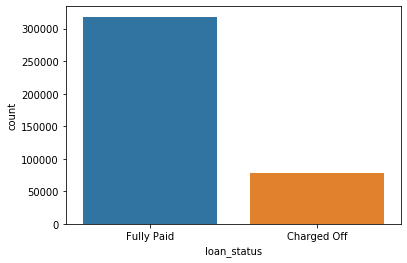

In [8]:
# CODE HERE
sns.countplot('loan_status', data = data)

**TASK: Create a histogram of the loan_amnt column.**

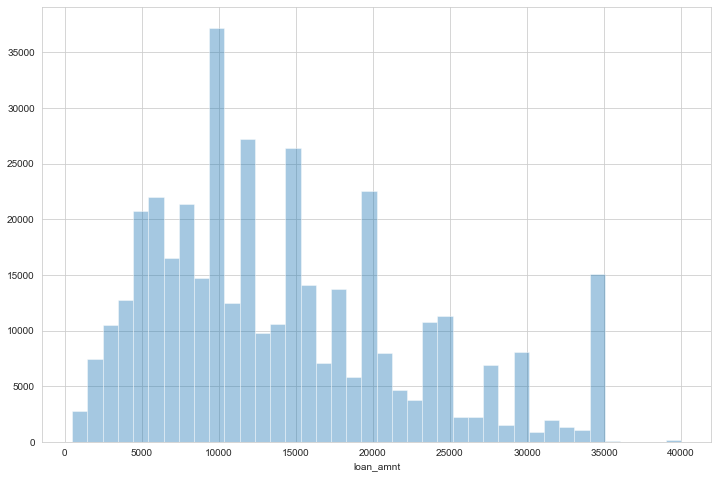

In [9]:
# CODE HERE
sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.distplot(data['loan_amnt'], kde = False, bins = 40)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [10]:
# CODE HERE
data.corr()['loan_amnt'].sort_values()

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

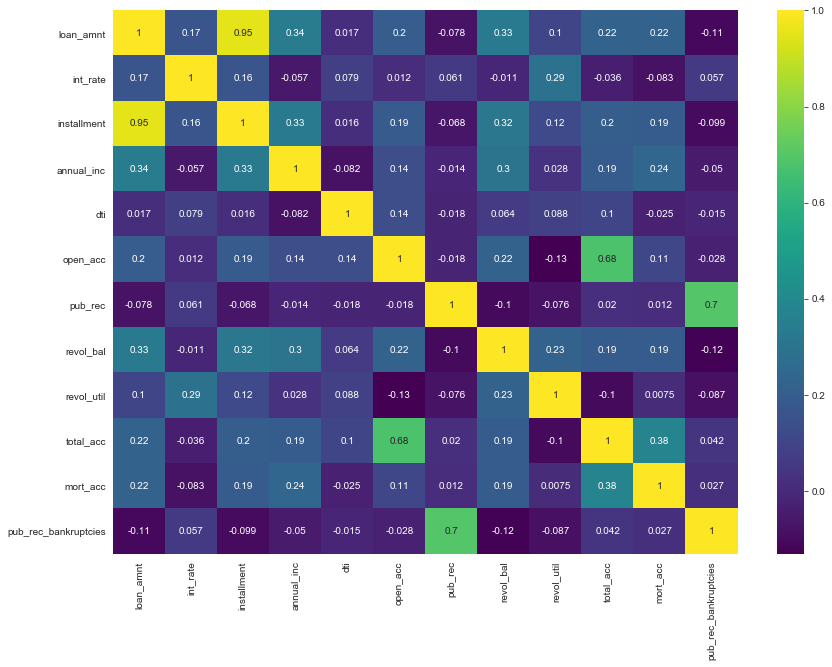

In [11]:
# CODE HERE
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

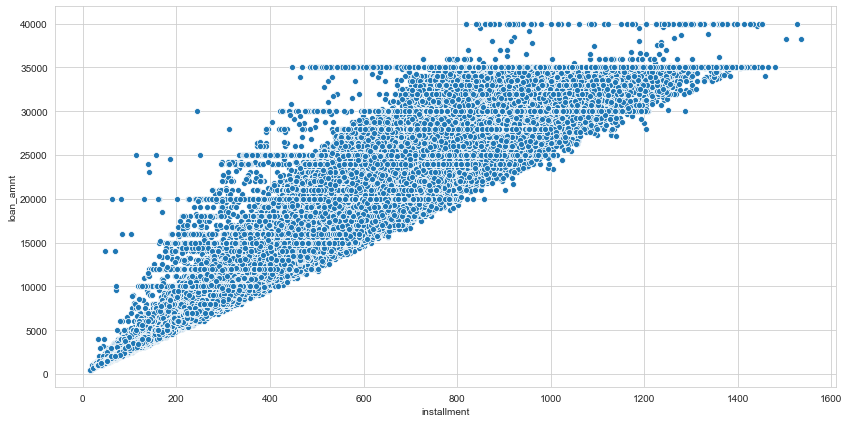

In [12]:
# CODE HERE
plt.figure(figsize = (14,7))
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = data)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

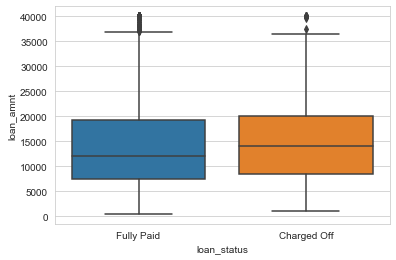

In [13]:
# CODE HERE
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = data)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [14]:
# CODE HERE
data.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [15]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [16]:
# CODE HERE
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

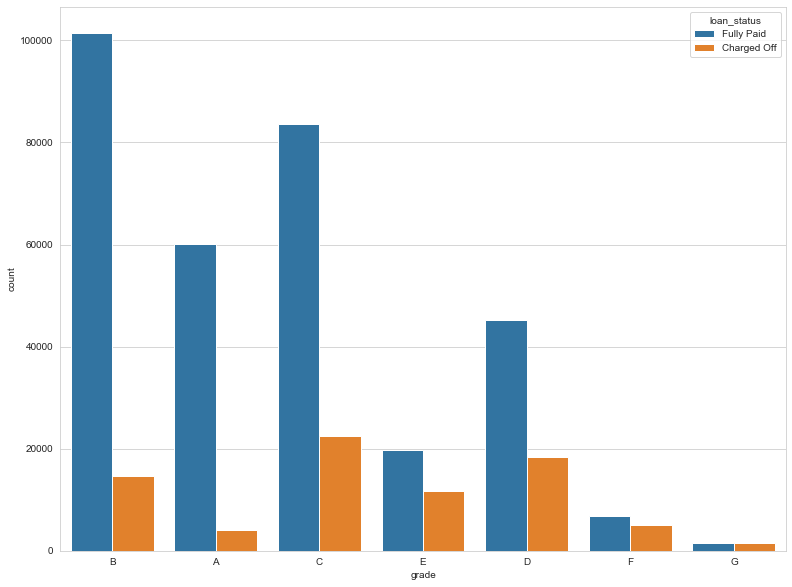

In [17]:
# CODE HERE
plt.figure(figsize = (13,10))
sns.countplot(x = 'grade', hue = 'loan_status', data = data)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

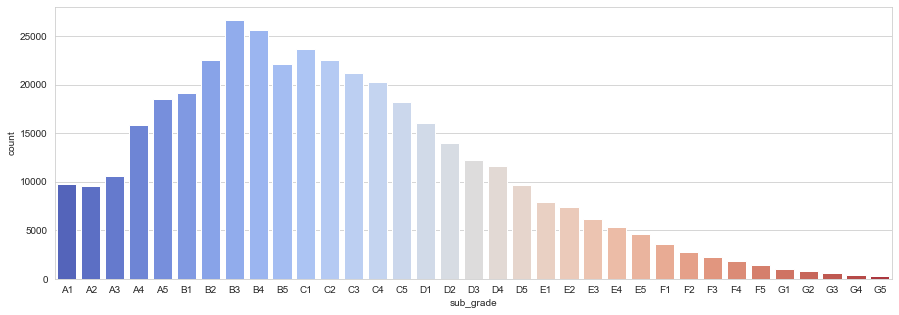

In [18]:
#CODE HERE
plt.figure(figsize = (15,5))
sns.countplot(x = 'sub_grade', data = data, palette = 'coolwarm', order = sorted(data['sub_grade'].unique()))

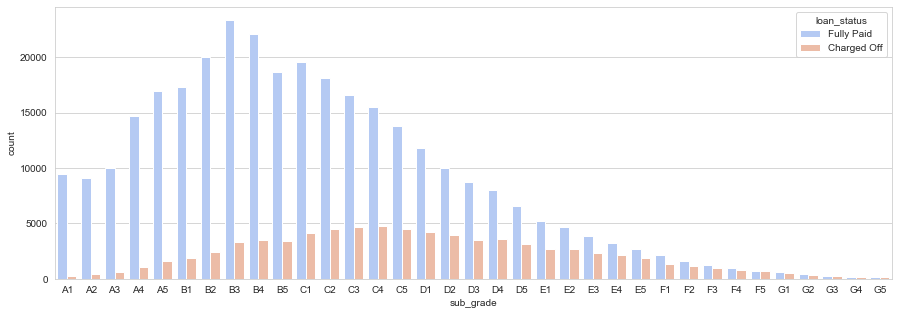

In [19]:
# CODE HERE
plt.figure(figsize = (15,5))
sns.countplot(x = 'sub_grade', data = data, palette = 'coolwarm', order = sorted(data['sub_grade'].unique()), hue = 'loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [20]:
f_and_g = data[(data['grade'] == 'F') | (data['grade'] == 'G')]
f_and_g

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.00,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.00,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.00,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.00,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.00,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395875,10000.0,60 months,24.50,290.59,F,F3,soldier,10+ years,RENT,54000.00,...,10.0,0.0,23783.0,91.1,26.0,w,INDIVIDUAL,2.0,0.0,"PSC 1848, Box 3238\nAPO AA 29597"
395908,4075.0,36 months,24.99,162.00,F,F4,NaN,NaN,RENT,13000.00,...,7.0,0.0,4224.0,49.7,13.0,w,INDIVIDUAL,0.0,0.0,"57621 Benjamin Greens Apt. 527\nSouth Richard,..."
395957,14525.0,60 months,21.99,401.09,F,F1,AUDITOR,5 years,RENT,55000.00,...,7.0,1.0,5304.0,67.1,28.0,w,INDIVIDUAL,2.0,1.0,639 Gillespie Forge Apt. 571\nEast Robertmouth...
395976,16475.0,60 months,25.83,491.62,G,G2,assembly technician,7 years,OWN,55000.00,...,17.0,0.0,15548.0,41.2,55.0,f,INDIVIDUAL,0.0,0.0,"0288 Joseph Lakes Suite 493\nLarsonfurt, ID 70466"


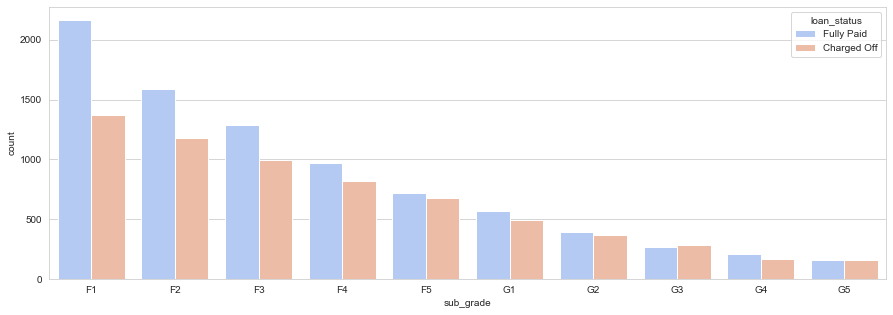

In [21]:
# CODE HERE
plt.figure(figsize = (15,5))
sns.countplot(x = f_and_g['sub_grade'], data = f_and_g, palette = 'coolwarm', order = sorted(f_and_g['sub_grade'].unique()), hue = 'loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [22]:
# CODE HERE
data['loan_repaid'] = pd.get_dummies(data['loan_status'], drop_first = True)

In [23]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

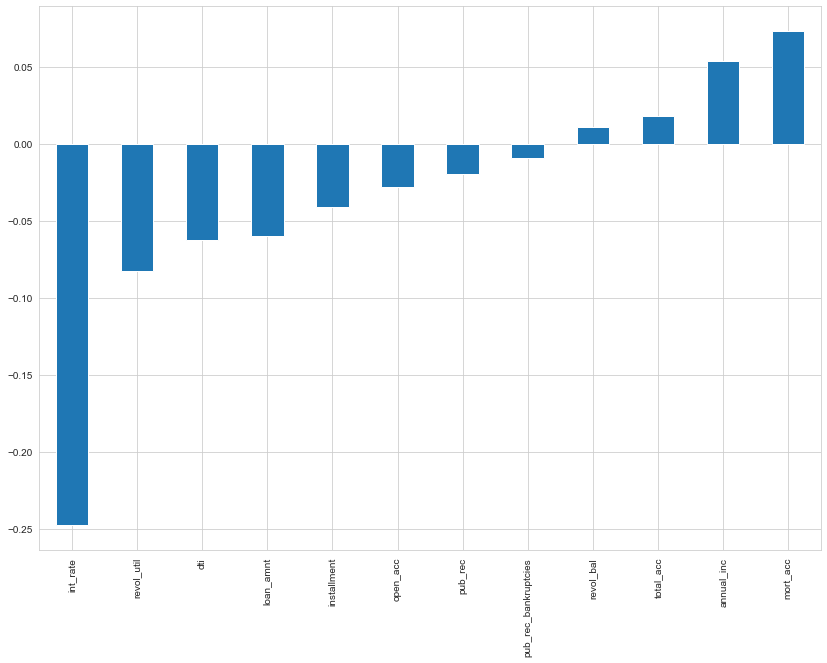

In [24]:
#CODE HERE
plt.figure(figsize = (14,10))
data.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind = 'bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [26]:
# CODE HERE
len(data)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [27]:
# CODE HERE
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [28]:
# CODE HERE
(data.isnull().sum()/len(data))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [29]:
# CODE HERE
feat_info('emp_title')

feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [30]:
# CODE HERE
data['emp_title'].nunique()

173105

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [31]:
# CODE HERE
data.drop('emp_title', axis = 1, inplace = True)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [32]:
order = ['< 1 year',
         '1 year',
         '2 years',
         '3 years',
         '4 years',
         '5 years',
         '6 years',
         '7 years',
         '8 years',
         '9 years',
         '10+ years'
        ]

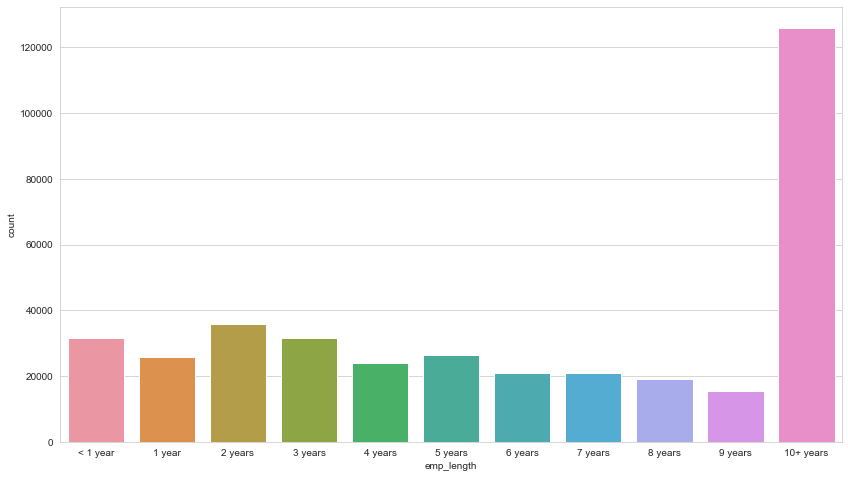

In [33]:
# CODE HERE
plt.figure(figsize = (14,8))
sns.countplot(x = 'emp_length', data = data, order = order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

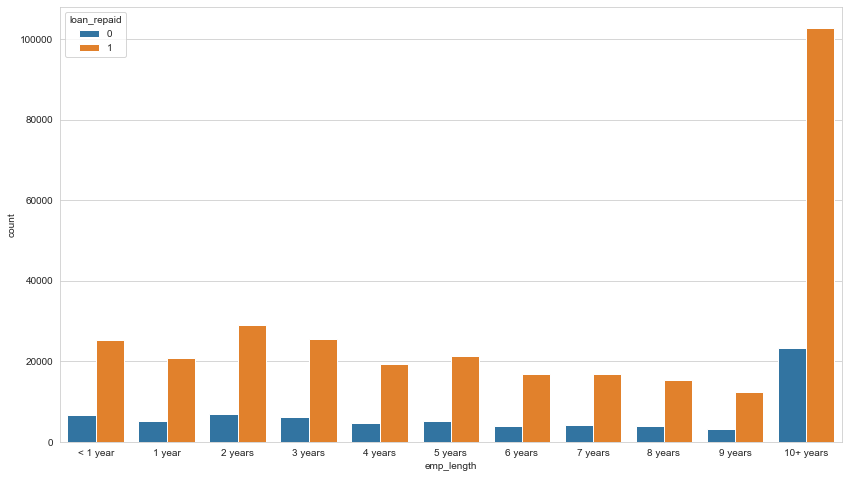

In [34]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'emp_length', data = data, order = order, hue = 'loan_repaid')
# CODE HERE

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [35]:
np.sum(data[data['emp_length']  == '1 year']['loan_repaid'] == 0)

5154

In [36]:
# CODE HERE
emp_np = data[data['loan_repaid'] == 0].groupby('emp_length').count()['loan_repaid']
emp_total = data.groupby('emp_length').count()['loan_repaid']

In [37]:
perc = emp_np/emp_total

In [38]:
perc

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

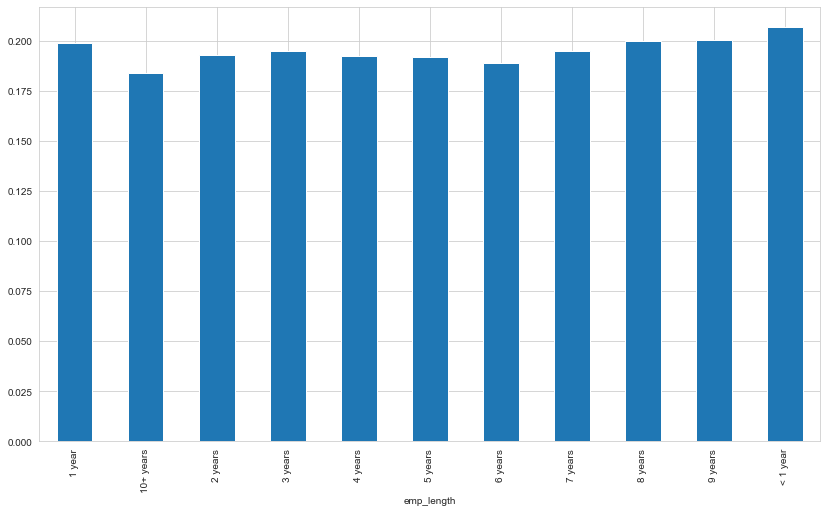

In [39]:
plt.figure(figsize = (14,8))
perc.plot(kind = 'bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [40]:
# CODE HERE
data.drop('emp_length', axis = 1, inplace = True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [41]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [42]:
# CODE HERE
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [43]:
# CODE HERE
data.drop('title', axis = 1, inplace = True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [44]:
# CODE HERE
feat_info('mort_acc')

Number of mortgage accounts.


In [45]:
data.corr()['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

**TASK: Create a value_counts of the mort_acc column.**

In [46]:
# CODE HERE
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

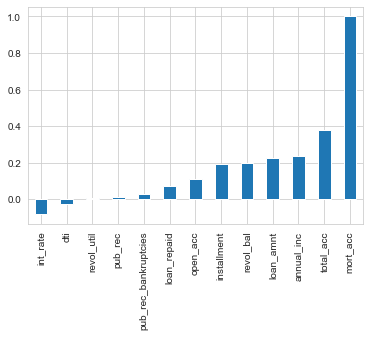

In [47]:
data.corr()['mort_acc'].sort_values().plot(kind = 'bar')

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [48]:
total_acc_average = data.groupby('total_acc').mean()['mort_acc']

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [49]:
# CODE HERE
def empty_mort_values(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_average[total_acc]
    else:
        return mort_acc
        

In [50]:
data['mort_acc'] = data.apply(lambda x: empty_mort_values(x['total_acc'], x['mort_acc']), axis = 1)

In [51]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [52]:
# CODE HERE
(data.isnull().sum()/len(data))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [53]:
data.dropna(inplace = True)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [54]:
# CODE HERE
data.select_dtypes('object').dtypes

term                   object
grade                  object
sub_grade              object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [55]:
# CODE HERE
def fill_term(term):
    if term == '36 months':
        return 36
    else:
        return 60

In [56]:
data['term'] = data.apply(lambda x: fill_term(x['term']), axis = 1)

In [57]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,60,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,60,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,60,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,60,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [58]:
# CODE HERE
data.drop('grade', axis = 1, inplace = True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [59]:
# CODE
data = pd.concat([data,pd.get_dummies(data['sub_grade'], drop_first = True )], axis = 1)

In [60]:
data.drop('sub_grade', axis = 1, inplace = True)

In [61]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [62]:
data.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [63]:
# CODE HERE
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [64]:
data = pd.concat([data,pd.get_dummies(data['verification_status'], drop_first = True )], axis = 1)

In [65]:
data = pd.concat([data, pd.get_dummies(data['application_type'], drop_first = True ), pd.get_dummies(data['initial_list_status'], drop_first = True ), pd.get_dummies(data['purpose'], drop_first = True )], axis = 1)

In [66]:
data.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1, inplace = True)

In [67]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [68]:
#CODE HERE
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [69]:
#CODE HERE
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [70]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [71]:
data = pd.concat([data,pd.get_dummies(data['home_ownership'], drop_first = True)], axis = 1)

In [72]:
data.drop('home_ownership', axis =1, inplace = True)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [73]:
#CODE HERE
def zip_code(address, zip_code):
    if np.isnan(zip_code):
        return address[-5:]

In [74]:
data['zip_code'] = np.nan

In [75]:
data['zip_code'] = data.apply(lambda x: zip_code(x['address'], x['zip_code']), axis = 1)

In [76]:
data['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [77]:
data.drop('address', axis = 1, inplace = True)

In [78]:
data = pd.concat([data, pd.get_dummies(data['zip_code'], drop_first = True)], axis = 1)

In [79]:
data.drop('zip_code', axis = 1, inplace = True)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [80]:
#CODE HERE
data.drop('issue_d', axis = 1, inplace = True)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [81]:
#CODE HERE
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [82]:
data['earliest_cr_year'] = data.apply(lambda x: x['earliest_cr_line'].year, axis = 1)

In [83]:
data.drop('earliest_cr_line', axis = 1, inplace = True)

In [84]:
data.select_dtypes('object').dtypes

loan_status    object
dtype: object

In [85]:
data.columns
data.drop('loan_status', axis = 1, inplace = True)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [86]:
from sklearn.model_selection import train_test_split

**TASK: Set X and y variables to the .values of the features and label.**

In [87]:
#CODE HERE
X = data.drop('loan_repaid', axis = 1).values
y = data['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [88]:
# df = df.sample(frac=0.1,random_state=101)
#print(len(df))

**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [89]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 100)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [90]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [94]:
X_train.shape

(296414, 78)

In [95]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
#Input Layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))

#Hidden Layers
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1, activation = 'sigmoid'))
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [97]:
# CODE HERE
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40, batch_size = 256, verbose = 1)

Train on 296414 samples, validate on 98805 samples
Epoch 1/40
296414/296414 [==============================] - 16s 53us/sample - loss: 0.3449 - val_loss: 0.2635
Epoch 2/40
296414/296414 [==============================] - 13s 43us/sample - loss: 0.2775 - val_loss: 0.2608
Epoch 3/40
296414/296414 [==============================] - 13s 43us/sample - loss: 0.2710 - val_loss: 0.2629
Epoch 4/40
296414/296414 [==============================] - 13s 43us/sample - loss: 0.2690 - val_loss: 0.2603
Epoch 5/40
296414/296414 [==============================] - 12s 42us/sample - loss: 0.2672 - val_loss: 0.2598
Epoch 6/40
296414/296414 [==============================] - 12s 41us/sample - loss: 0.2666 - val_loss: 0.2590
Epoch 7/40
296414/296414 [==============================] - 12s 40us/sample - loss: 0.2659 - val_loss: 0.2591
Epoch 8/40
296414/296414 [==============================] - 12s 41us/sample - loss: 0.2660 - val_loss: 0.2584
Epoch 9/40
296414/296414 [==============================] - 12s 42us/

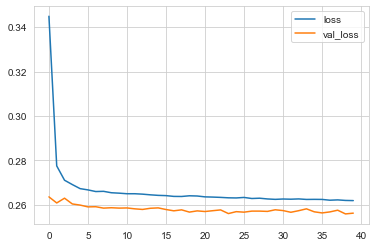

In [98]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**TASK: OPTIONAL: Save your model.**

In [99]:
# CODE HERE
from tensorflow.keras.models import load_model

In [100]:
model.save('loan_repayment_predictor.h5')

In [101]:
#model = load_model('loan_repayment_predictor.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [104]:
# CODE HERE
y_pred = model.predict_classes(X_test)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     19324
           1       0.88      1.00      0.94     79481

    accuracy                           0.89     98805
   macro avg       0.94      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [107]:
print(confusion_matrix(y_test, y_pred))

[[ 8359 10965]
 [   16 79465]]


In [1]:
X_train.shape

NameError: name 'X_train' is not defined

**TASK: Given the customer below, would you offer this person a loan?**

In [108]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

new_customer = data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [111]:
# CODE HERE
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [ ]:
# CODE HERE

# GREAT JOB!